# ORB IMPROVE

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time,math

imgname1 = './Else/TitechIMG'
imgname2 = './Else/TitechIMG_test01'

# Key point - Find & Describe

In [2]:
orb = cv2.ORB_create()

img1 = cv2.imread(imgname1+".jpg")
img2 = cv2.imread(imgname2+".jpg")
kp1, des1 = orb.detectAndCompute(img1,None) #des是描述子
kp2, des2 = orb.detectAndCompute(img2,None)

# gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) # 灰化图片
# img1_Key = cv2.drawKeypoints(img1,kp1,img1,color=(100,200,255)) #在原图上画出特殊点

In [3]:
print("kp1:",len(kp1), "|| des1:",len(des1), "|| kp2:",len(kp2), "|| des2:",len(des2))

TypeError: object of type 'NoneType' has no len()

# Key ponit - Match

In [4]:
# BFMatcher解决匹配
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
matches = bf.knnMatch(des1,des2, k=2)

In [5]:
# 调整ratio
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [6]:
# for matche in good:
#     print(matche)
#     print(matche.queryIdx)
#     print(matche.trainIdx)
#     print(matche.distance)
dist = [m.distance for m in good]
print(len(dist))
print("matching points' average distance is "+str(np.mean(dist)))

0
matching points' average distance is nan


/Users/alpaca/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/alpaca/.local/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
matches = bf.match(des1,des2)
dist_matches = [m.distance for m in matches]
print(len(dist_matches))
print(np.mean(dist_matches))

0
nan


In [8]:
img_out = cv2.drawMatches(img1,kp1,img2,kp2,good,None,flags = 2)

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-tnokoph3/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [63]:
# 通过特征点坐标计算单应性矩阵H
# （findHomography中使用了RANSAC算法剔初错误匹配）
if len(good) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 7.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,H)

    img2_sqr = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" % (len(good),10))
    matchesMask = None

In [75]:
print("Each Length --", "good:",len(good), "|| src_pts:",len(src_pts), "|| dst_pts:",len(dst_pts), "|| mask:",len(mask), "|| H:",len(H),"\n")
print("matchesMask:", matchesMask)
print(type(matchesMask))
print("Length matchesMask:", np.count_nonzero(matchesMask))

Each Length -- good: 129 || src_pts: 129 || dst_pts: 129 || mask: 129 || H: 3 

matchesMask: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
<class 'list'>
Length matchesMask: 117


In [84]:
dist_ransac=[]
dist = [m.distance for m in good]
for m in range(len(good)):
    dist_ransac.append(dist[m]*matchesMask[m])
np.mean(dist_ransac)

20.131782945736433

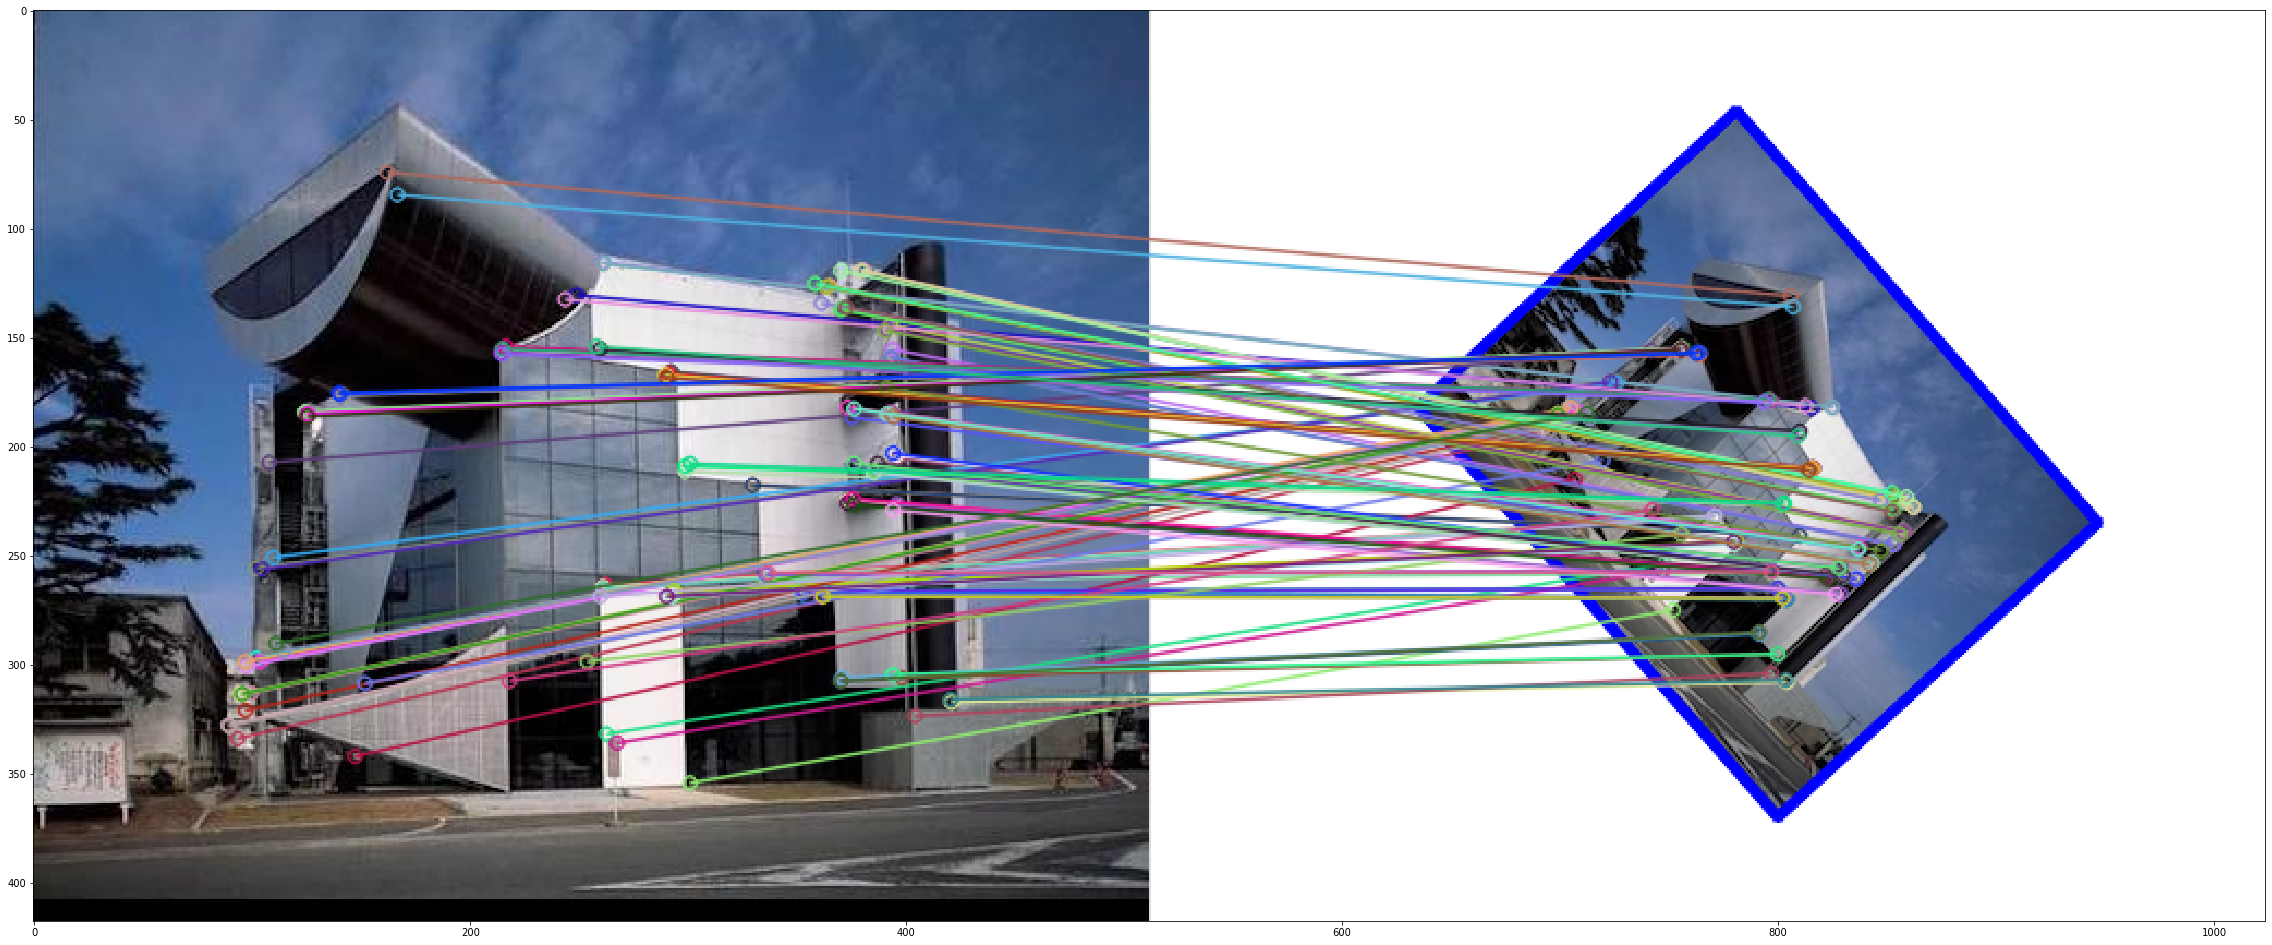

In [8]:
img5 = cv2.drawMatches(img1,kp1,img2_sqr,kp2,good,None,matchesMask = matchesMask,flags = 2)

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
# 保存结果

cv2.imwrite("Result_"+imgname1+"_RANSAC.jpg", img5)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

True